In [1]:
from q_learning import LearningTactic, QLearner, QLearningConfig

In [2]:
from q_learning import QLearner, QLearningConfig, LearningTactic
import math
import numpy as np
import matplotlib.pyplot as plt
import itertools

## Lunar Lander - opis eksperymentu
Przetestuje lunar landing dla dwóch konfiguracji, każdy w dwóch wariantach - Qlearning, Sarsa.

Dla obu eksperymentów używam tego samego podziału na buckety. Żeby przyspieszyć trening i zniechęcić model to utrzymywania pozycji, zmnijeszyłem parametr _max_episode_steps z 1000 do 700.

In [18]:
config = QLearningConfig(
    environment_name='LunarLander-v2',
    buckets_sizes = [ # 17 280
            [0.42, 0.16, 0.42], # x - (-1, 1)
            [0.05, 0.1, 0.2, 0.25, 0.4], # y - (0, 1)
            [0.4, 0.1, 0.1, 0.4], # vx - (-1, 1)
            [0.2, 0.15, 0.1, 0.05, 0.05, 0.45], # vy - (-1, 1)
            [0.45, 0.1, 0.45], # theta - (-1, 1)
            [0.4, 0.1, 0.1, 0.4], # vtheta - (-1, 1)
            [0.5, 0.5],
            [0.5, 0.5]
        ],
    discount_factor=0.99,
    experiment_rate_max=0.5,
    experiment_rate_min=0.01,
    experiment_rate_decay=1.8e-4,
    learning_rate_max=0.3,
    learning_rate_min=0.01,
    learning_rate_decay=1.8e-4,
    upper_bounds = [1, 1, 1, 1, 1, 1, 1, 1],
    lower_bounds = [-1, 0, -1, -1, -1, -1, 0, 0],
)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode    1000     | Average from last 1000:  -144.81    | Alpha:    0.25     | Epsilon:    0.42    | Time elapsed:   37.69   
Episode    2000     | Average from last 1000:  -123.25    | Alpha:    0.21     | Epsilon:    0.35    | Time elapsed:   64.53   
Episode    3000     | Average from last 1000:  -111.63    | Alpha:    0.18     | Epsilon:    0.30    | Time elapsed:   102.67  
Episode    4000     | Average from last 1000:  -112.56    | Alpha:    0.15     | Epsilon:    0.25    | Time elapsed:   161.49  
Episode    5000     | Average from last 1000:   -97.34    | Alpha:    0.13     | Epsilon:    0.21    | Time elapsed:   215.62  
Episode    6000     | Average from last 1000:   -90.20    | Alpha:    0.11     | Epsilon:    0.18    | Time elapsed:   281.87  
Episode    7000     | Average from last 1000:   -88.88    | Alpha:    0.09     | Epsilon:    0.15    | Time elapsed:   335.39  
Episo

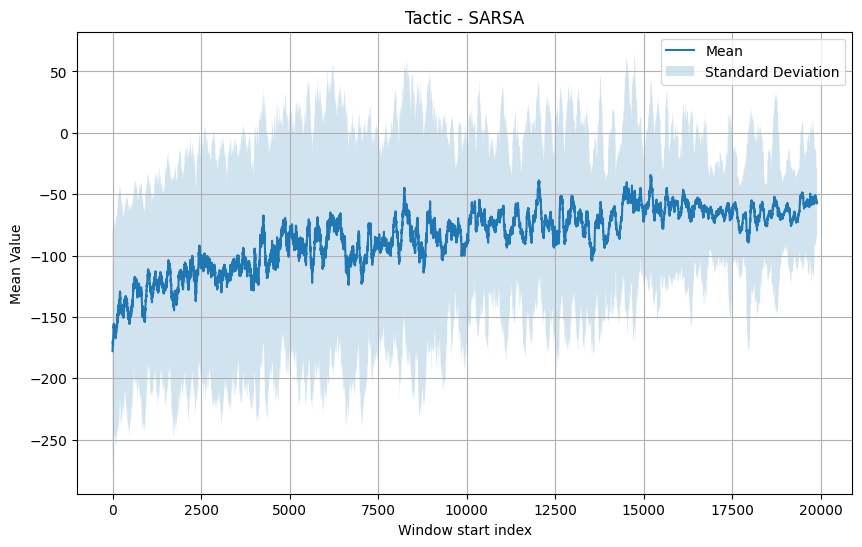

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode    1000     | Average from last 1000:  -110.31    | Alpha:    0.25     | Epsilon:    0.42    | Time elapsed:   34.69   
Episode    2000     | Average from last 1000:   -79.07    | Alpha:    0.21     | Epsilon:    0.35    | Time elapsed:   63.40   
Episode    3000     | Average from last 1000:   -85.98    | Alpha:    0.18     | Epsilon:    0.30    | Time elapsed:   86.61   
Episode    4000     | Average from last 1000:   -76.25    | Alpha:    0.15     | Epsilon:    0.25    | Time elapsed:   121.63  
Episode    5000     | Average from last 1000:   -73.62    | Alpha:    0.13     | Epsilon:    0.21    | Time elapsed:   162.66  
Episode    6000     | Average from last 1000:   -79.93    | Alpha:    0.11     | Epsilon:    0.18    | Time elapsed:   244.41  
Episode    7000     | Average from last 1000:   -61.64    | Alpha:    0.09     | Epsilon:    0.15    | Time elapsed:   283.28  
Episo

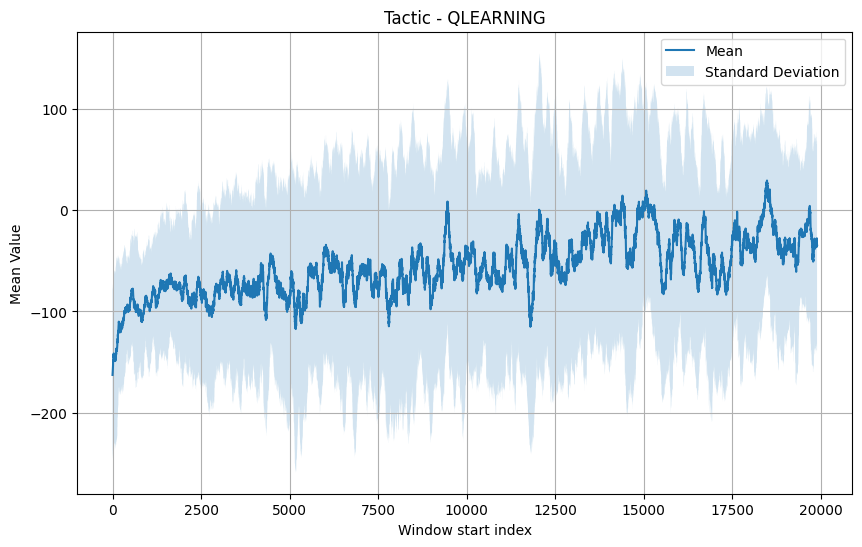

In [19]:
for tactic in [LearningTactic.SARSA, LearningTactic.QLEARNING]:
    learner = QLearner(config)

    learner.reset()
        
    array = learner.learn(20000, tactic=tactic, print_stats=True, print_every=1000)

    window_size = 100

    means_across_arrays = []
    std_devs_across_arrays = []

    for i in range(len(array) - window_size + 1):
        means_across_arrays.append(np.mean(array[i:i + window_size]))
        std_devs_across_arrays.append(np.std(array[i:i + window_size]))

    x = np.arange(len(means_across_arrays))

    plt.figure(figsize=(10, 6))
    plt.plot(x, means_across_arrays, label='Mean')

    plt.fill_between(x, np.array(means_across_arrays) - np.array(std_devs_across_arrays), 
                    np.array(means_across_arrays) + np.array(std_devs_across_arrays), alpha=0.2, label='Standard Deviation')

    plt.title(f"Tactic - {tactic.name}")
    plt.xlabel("Window start index")
    plt.ylabel("Mean Value")
    plt.legend()
    plt.grid(True)
    plt.show()

In [ ]:
config = QLearningConfig(
    environment_name='LunarLander-v2',
    buckets_sizes = [ # 17 280
            [0.42, 0.16, 0.42], # x - (-1, 1)
            [0.05, 0.1, 0.2, 0.25, 0.4], # y - (0, 1)
            [0.4, 0.1, 0.1, 0.4], # vx - (-1, 1)
            [0.2, 0.15, 0.1, 0.05, 0.05, 0.45], # vy - (-1, 1)
            [0.45, 0.1, 0.45], # theta - (-1, 1)
            [0.4, 0.1, 0.1, 0.4], # vtheta - (-1, 1)
            [0.5, 0.5],
            [0.5, 0.5]
        ],
    discount_factor=0.99,
    experiment_rate_max=0.9,
    experiment_rate_min=0.01,
    experiment_rate_decay=2.2e-4,
    learning_rate_max=0.7,
    learning_rate_min=0.025,
    learning_rate_decay=2.2e-4,
    upper_bounds = [1, 1, 1, 1, 1, 1, 1, 1],
    lower_bounds = [-1, 0, -1, -1, -1, -1, 0, 0],
)

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode    1000     | Average from last 1000:  -191.37    | Alpha:    0.58     | Epsilon:    0.74    | Time elapsed:   18.46   
Episode    2000     | Average from last 1000:  -161.18    | Alpha:    0.48     | Epsilon:    0.61    | Time elapsed:   16.15   
Episode    3000     | Average from last 1000:  -142.57    | Alpha:    0.40     | Epsilon:    0.50    | Time elapsed:   20.20   
Episode    4000     | Average from last 1000:  -124.69    | Alpha:    0.33     | Epsilon:    0.41    | Time elapsed:   40.63   
Episode    5000     | Average from last 1000:  -111.46    | Alpha:    0.27     | Epsilon:    0.34    | Time elapsed:   113.34  
Episode    6000     | Average from last 1000:  -111.72    | Alpha:    0.23     | Epsilon:    0.28    | Time elapsed:   167.14  
Episode    7000     | Average from last 1000:  -106.58    | Alpha:    0.19     | Epsilon:    0.23    | Time elapsed:   303.49  
Episo

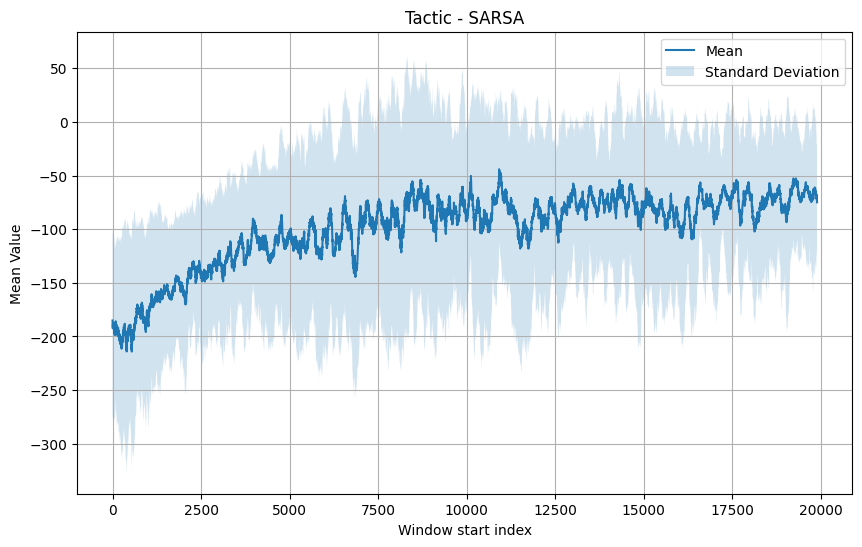

WARN: gym.spaces.Box autodetected dtype as <class 'numpy.float32'>. Please provide explicit dtype.
Episode    1000     | Average from last 1000:  -184.85    | Alpha:    0.58     | Epsilon:    0.74    | Time elapsed:   17.77   
Episode    2000     | Average from last 1000:  -155.59    | Alpha:    0.48     | Epsilon:    0.61    | Time elapsed:   20.19   
Episode    3000     | Average from last 1000:  -142.74    | Alpha:    0.40     | Epsilon:    0.50    | Time elapsed:   23.99   
Episode    4000     | Average from last 1000:  -136.32    | Alpha:    0.33     | Epsilon:    0.41    | Time elapsed:   46.86   
Episode    5000     | Average from last 1000:  -126.01    | Alpha:    0.27     | Epsilon:    0.34    | Time elapsed:   48.68   
Episode    6000     | Average from last 1000:  -114.03    | Alpha:    0.23     | Epsilon:    0.28    | Time elapsed:   86.88   
Episode    7000     | Average from last 1000:  -116.25    | Alpha:    0.19     | Epsilon:    0.23    | Time elapsed:   128.03  
Episo

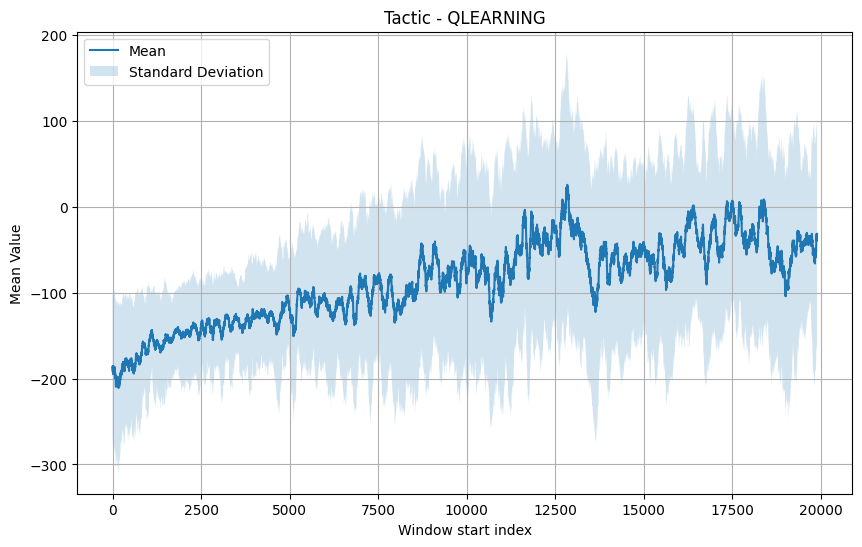

In [17]:
for tactic in [LearningTactic.SARSA, LearningTactic.QLEARNING]:
    learner = QLearner(config)

    learner.reset()
        
    array = learner.learn(20000, tactic=tactic, print_stats=True, print_every=1000)

    window_size = 100

    means_across_arrays = []
    std_devs_across_arrays = []

    for i in range(len(array) - window_size + 1):
        means_across_arrays.append(np.mean(array[i:i + window_size]))
        std_devs_across_arrays.append(np.std(array[i:i + window_size]))

    x = np.arange(len(means_across_arrays))

    plt.figure(figsize=(10, 6))
    plt.plot(x, means_across_arrays, label='Mean')

    plt.fill_between(x, np.array(means_across_arrays) - np.array(std_devs_across_arrays), 
                    np.array(means_across_arrays) + np.array(std_devs_across_arrays), alpha=0.2, label='Standard Deviation')

    plt.title(f"Tactic - {tactic.name}")
    plt.xlabel("Window start index")
    plt.ylabel("Mean Value")
    plt.legend()
    plt.grid(True)
    plt.show()

## Wnioski
- Środowisko charakteryzuje się sporą losowością - duże odhylenie standardowe.
- SARSA zatrzymuje się idealnie na -50, na oko wygląda na to, że uważa lądowanie za zbyt ryzykowną akcje i próbuje zostać jak najdłużej "w powietrzu" o czym świadczy długi czas treningu (elapsed time), prawdopodobnie nie mamy pawidłowych lądowań.
- Q-learning zdaje się działać lepiej i umie wykonać prawidłowe lądowanie (dodatnia nagroda), ale jest również mniej stabilny niż sarsa (większe odhylenie standardowe). Model prawdopodobnie wciąż wpada w suboptymalne zachowania np. czasem lepiej szybko się rozbić i nie marnować paliwa, a czasem zostać bezpiecznie w powietrzu kosztem małej ujemnej nagrody zamiast zgarnąć -100 za krakse